In [472]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [473]:
df=pd.read_csv('TITANIC.csv')

In [474]:
df.shape

(891, 12)

In [475]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [476]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [477]:
dp=pd.DataFrame(df.dtypes)
dp=dp.rename(columns={0:'Data Type'})
dp['Missing Values']=df.isnull().sum()
dp['Unique']=df.nunique()
dp['Count']=df.count()
dp

,Data Type,Missing Values,Unique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [478]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [479]:
# Checking the percentage of people survived

print("{} %".format((df.Survived.sum()/df.Survived.count())*100))

38.38383838383838 %


# Treating Outliers

***1.Pclass***

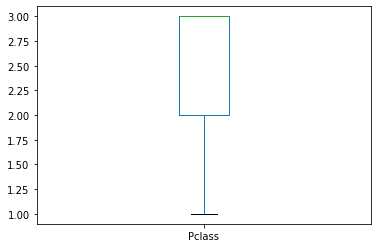

In [480]:
df['Pclass'].plot.box()

**No ouliers present in Pclass**

***2.Age***

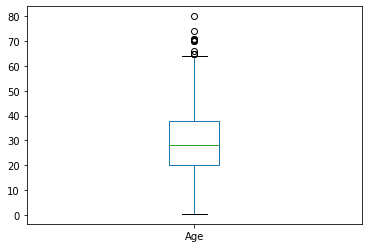

In [481]:
df['Age'].plot.box()

In [482]:
df.loc[df['Age']>50, 'Age'] = np.mean(df['Age'])

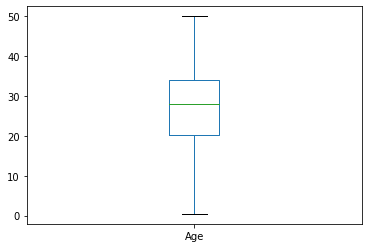

In [483]:
df['Age'].plot.box()

***3.Fare***

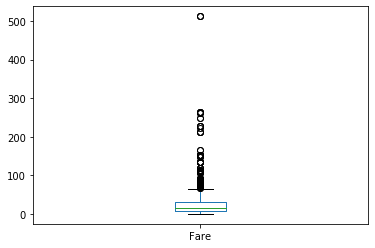

In [484]:
df['Fare'].plot.box()

In [485]:
df.loc[df['Fare']>60, 'Fare'] = np.mean(df['Fare'])

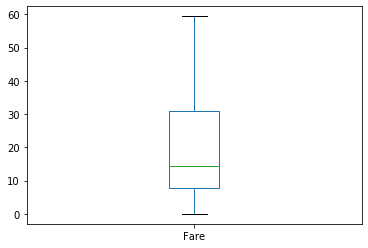

In [486]:
df['Fare'].plot.box()

***4.SibSp and Parch as Relatives***

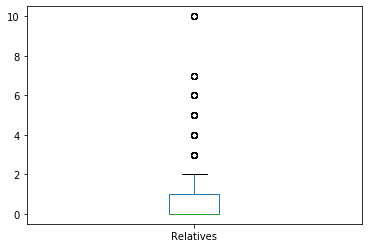

In [487]:
# Combining the variables SibSp and parch
data=[df]
for x in data:
    df['Relatives']=df['SibSp']+df['Parch']

df['Relatives'].plot.box()

In [488]:
df.loc[df['Relatives']>2, 'Relatives'] = np.mean(df['Relatives'])

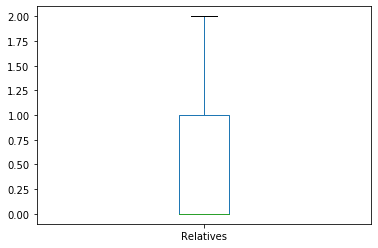

In [489]:
df['Relatives'].plot.box()

# Treating Missing Values

***1.Age Variable***

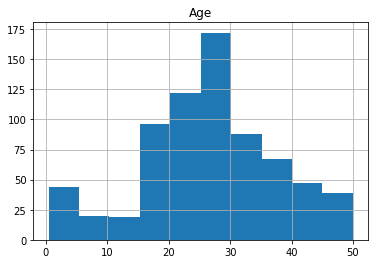

In [490]:
df.hist(column='Age')
plt.show()

In [491]:
df['Age'].isnull().sum()

177

In [492]:
df['Age']=df['Age'].fillna(df['Age'].mean())

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S,0.0


In [493]:
df['Age'].isnull().sum()

0

***2.Fare Variable***

****The variable "Fare" has few values as "0", which is not possible, hence they can be marked as missing values****

In [494]:
print((df.Fare==0).sum())

15


In [495]:
df.Fare=df.Fare.replace(0,np.NaN)

print((df.Fare==0).sum())

0


In [496]:
df[df.Fare.isnull()].index

Int64Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822],
           dtype='int64')

In [497]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,1.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,32.204208,C85,C,1.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S,0.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,1.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S,0.000000
5,6,0,3,"Moran, Mr. James",male,27.097918,0,0,330877,8.458300,NaN,Q,0.000000
6,7,0,1,"McCarthy, Mr. Timothy J",male,29.699118,0,0,17463,51.862500,E46,S,0.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,NaN,S,0.904602
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,NaN,S,2.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,NaN,C,1.000000


***3.Cabin***

***Since in the cabin feature 687 out of 892 i.e. almost 77% of the data is missing so we can drop this column***

In [498]:
df = df.drop(['Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,S,0.0


***4.Embarked Variable***

In [499]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [500]:
common_value='S'
data=[df]

for x in data:
    x['Embarked']=x['Embarked'].fillna(common_value)
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,S,0.0


In [501]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Relatives      0
dtype: int64

***So now we see that there is no missing values in the dataset***

# Exploring the features

<function matplotlib.pyplot.show(*args, **kw)>

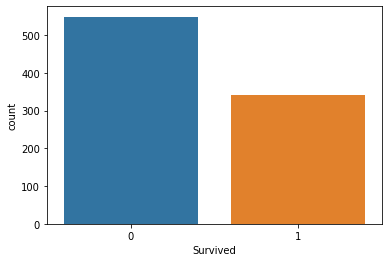

In [502]:
sb.countplot('Survived', data=df)
plt.show

In [503]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

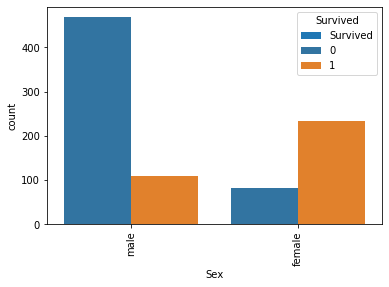

In [504]:
# Bar plotting the above groupby data

df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
sb.countplot('Sex',hue='Survived', data=df)
plt.show

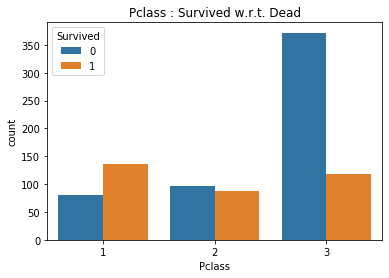

In [505]:
sb.countplot('Pclass', hue='Survived', data=df)
plt.title('Pclass : Survived w.r.t. Dead')
plt.show()

In [506]:
# Checking what percentage of female and male survived

print("{} % of female survived ".format((df[df.Sex=='female'].Survived.sum()/df[df.Sex=='female'].Survived.count())*100))
print("{} % of male survived ".format((df[df.Sex=='male'].Survived.sum()/df[df.Sex=='male'].Survived.count())*100))

74.20382165605095 % of female survived 
18.890814558058924 % of male survived 


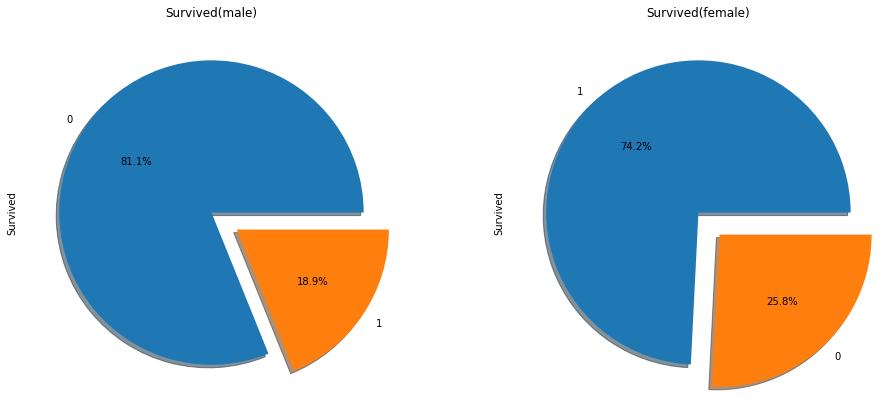

In [507]:
f, ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%', ax=ax[0], shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Survived(male)')
ax[1].set_title('Survived(female)')
plt.show()

# Visualizing the survival rate with other variables

In [508]:
# Visualising with the variable Pclass

pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='winter_r')

In [509]:
print("Survivals percentage in : ")
print("Pclass=1 is {} % ".format((df[df.Pclass==1].Survived.sum()/df[df.Pclass==1].Survived.count())*100))
print("Pclass=2 is {} % ".format((df[df.Pclass==2].Survived.sum()/df[df.Pclass==2].Survived.count())*100))
print("Pclass=3 is {} % ".format((df[df.Pclass==3].Survived.sum()/df[df.Pclass==3].Survived.count())*100))

Survivals percentage in : 
Pclass=1 is 62.96296296296296 % 
Pclass=2 is 47.28260869565217 % 
Pclass=3 is 24.236252545824847 % 


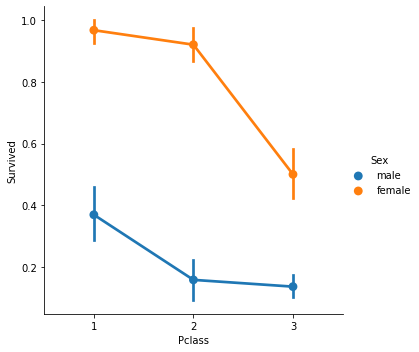

In [510]:
# Factorplot

sb.factorplot('Pclass', 'Survived', hue='Sex', data=df)
plt.show()

# Univariate Analysis

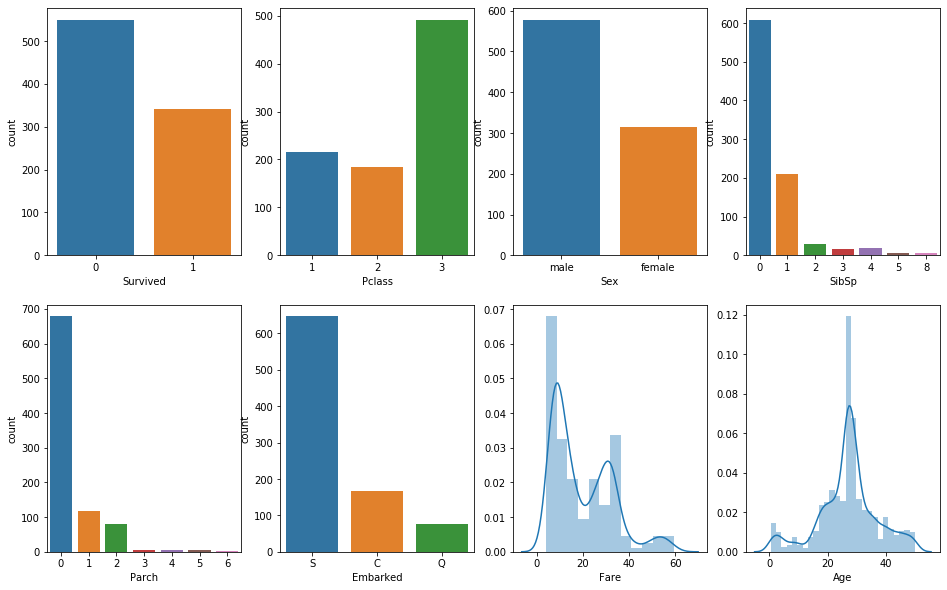

In [511]:
fig, axes = plt.subplots(2,4,figsize=(16,10))
sb.countplot('Survived', data=df, ax=axes[0,0])
sb.countplot('Pclass', data=df, ax=axes[0,1])
sb.countplot('Sex', data=df, ax=axes[0,2])
sb.countplot('SibSp', data=df, ax=axes[0,3])
sb.countplot('Parch', data=df, ax=axes[1,0])
sb.countplot('Embarked', data=df, ax=axes[1,1])
sb.distplot(df['Fare'], kde=True, ax=axes[1,2])
sb.distplot(df['Age'], kde=True, ax=axes[1,3])

# Bivariate Analysis

Text(0, 0.5, 'Fare')

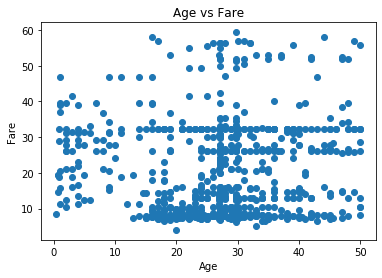

In [512]:
plt.scatter(df['Age'], df['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

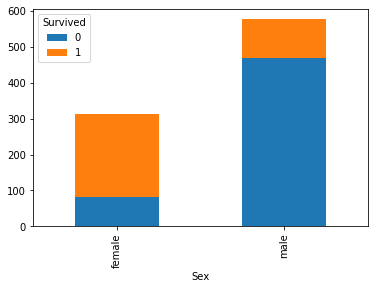

In [513]:
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', stacked=True)

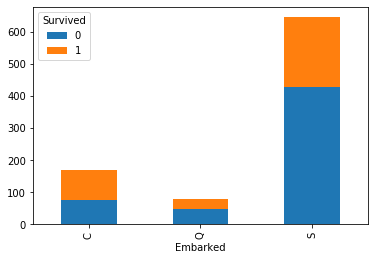

In [514]:
pd.crosstab(df['Embarked'], df['Survived']).plot(kind='bar', stacked=True)

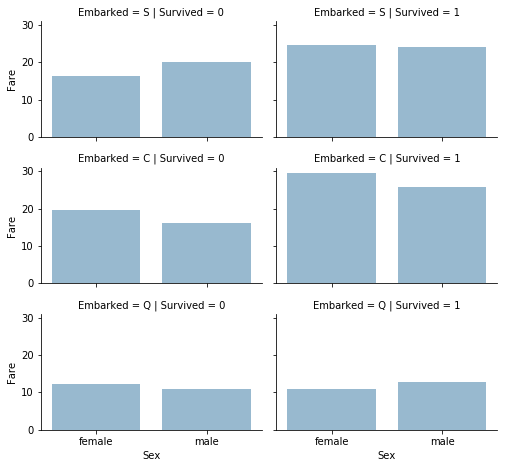

In [515]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Modifying existing features

In [516]:
# Sex feature is converted to a new feature where female=1 and male=0.

li = [df]
for dataset in li:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.250000,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,32.204208,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.925000,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.100000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.050000,S,0.0


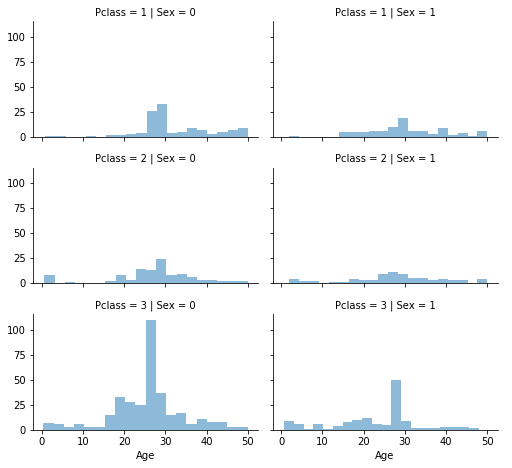

In [517]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

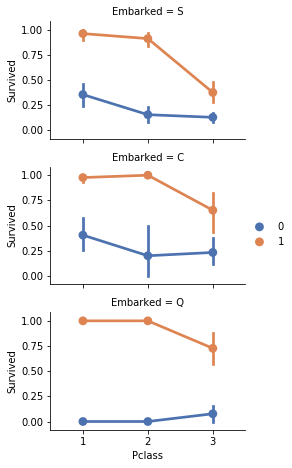

In [518]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [519]:
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [520]:
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [521]:
# We can convert the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.250000,S,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,32.204208,C,1.0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.925000,S,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.100000,S,1.0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.050000,S,0.0,1


In [522]:
# Now we can safely drop the Name feature from training and testing datasets.
# We can also drop the Ticket feature as it doesn't contribute in predicting the survival rate of a person.

df = df.drop(['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Title
0,1,0,3,0,22.0,1,0,7.250000,S,1.0,1
1,2,1,1,1,38.0,1,0,32.204208,C,1.0,3
2,3,1,3,1,26.0,0,0,7.925000,S,0.0,2
3,4,1,1,1,35.0,1,0,53.100000,S,1.0,3
4,5,0,3,0,35.0,0,0,8.050000,S,0.0,1


In [523]:
# Creating Age bands and determininig the correlations with Survived.

df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.37, 10.336]",0.593750
1,"(10.336, 20.252]",0.382609
2,"(20.252, 30.168]",0.335456
3,"(30.168, 40.084]",0.445161
4,"(40.084, 50.0]",0.383721


In [524]:
for dataset in data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Title,AgeBand
0,1,0,3,0,22.0,1,0,7.250000,S,1.0,1,"(20.252, 30.168]"
1,2,1,1,1,38.0,1,0,32.204208,C,1.0,3,"(30.168, 40.084]"
2,3,1,3,1,26.0,0,0,7.925000,S,0.0,2,"(20.252, 30.168]"
3,4,1,1,1,35.0,1,0,53.100000,S,1.0,3,"(30.168, 40.084]"
4,5,0,3,0,35.0,0,0,8.050000,S,0.0,1,"(30.168, 40.084]"


In [525]:
# We can now remove the AgeBand feature.

df = df.drop(['AgeBand'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Title
0,1,0,3,0,22.0,1,0,7.250000,S,1.0,1
1,2,1,1,1,38.0,1,0,32.204208,C,1.0,3
2,3,1,3,1,26.0,0,0,7.925000,S,0.0,2
3,4,1,1,1,35.0,1,0,53.100000,S,1.0,3
4,5,0,3,0,35.0,0,0,8.050000,S,0.0,1


In [526]:
# Let us drop Parch and SibSp features in favor of Relatives.

df = df.drop(['Parch', 'SibSp'], axis=1)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
0,1,0,3,0,22.0,7.250000,S,1.0,1
1,2,1,1,1,38.0,32.204208,C,1.0,3
2,3,1,3,1,26.0,7.925000,S,0.0,2
3,4,1,1,1,35.0,53.100000,S,1.0,3
4,5,0,3,0,35.0,8.050000,S,0.0,1


In [527]:
# We can convert the Embarked feature by creating a new numeric feature.

ports = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
0,1,0,3,0,22.0,7.250000,0,1.0,1
1,2,1,1,1,38.0,32.204208,1,1.0,3
2,3,1,3,1,26.0,7.925000,0,0.0,2
3,4,1,1,1,35.0,53.100000,0,1.0,3
4,5,0,3,0,35.0,8.050000,0,0.0,1


In [528]:
# Creating Fare bands and determininig the correlations with Survived.

df['FareBand'] = pd.qcut(df['Fare'], 4)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(4.010999999999999, 7.925]",0.225664
1,"(7.925, 14.5]",0.272727
2,"(14.5, 31.0]",0.466981
3,"(31.0, 59.4]",0.581081


In [529]:
for dataset in li:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df = df.drop(['FareBand'], axis=1)
li = [df]
    
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Title
0,1,0,3,0,22.000000,7.250000,0,1.000000,1
1,2,1,1,1,38.000000,32.204208,1,1.000000,3
2,3,1,3,1,26.000000,7.925000,0,0.000000,2
3,4,1,1,1,35.000000,53.100000,0,1.000000,3
4,5,0,3,0,35.000000,8.050000,0,0.000000,1
5,6,0,3,0,27.097918,8.458300,2,0.000000,1
6,7,0,1,0,29.699118,51.862500,0,0.000000,1
7,8,0,3,0,2.000000,21.075000,0,0.904602,4
8,9,1,3,1,27.000000,11.133300,0,2.000000,3
9,10,1,2,1,14.000000,30.070800,1,1.000000,3


In [530]:
df['Relatives'].value_counts()

0.000000    537
1.000000    161
2.000000    102
0.904602     91
Name: Relatives, dtype: int64

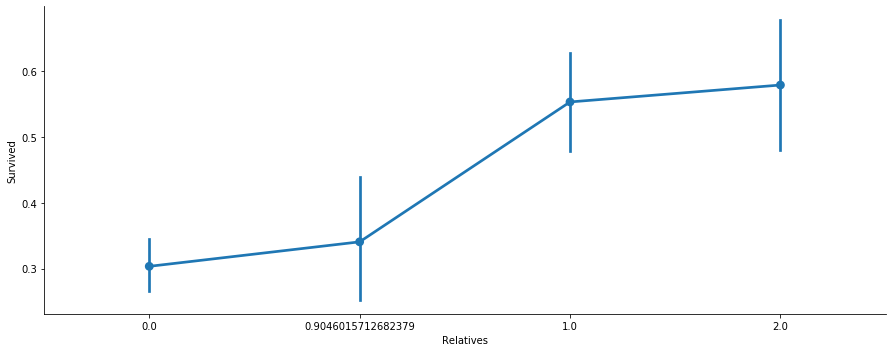

In [531]:
axes=sb.factorplot('Relatives','Survived', data=df, aspect=2.5)

# Joint Plots( Continuous Vs Continuous)

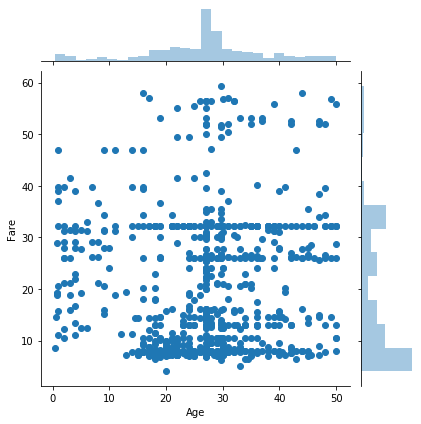

In [532]:
sb.jointplot(x='Age', y='Fare', data=df)

In [533]:
print('Oldest person Survived was aged : ', df['Age'].max())
print('Youngest person Survived was aged : ', df['Age'].min())
print('Age of the average person survived : ', df['Age'].mean())

Oldest person Survived was aged :  50.0
Youngest person Survived was aged :  0.42
Age of the average person survived :  27.097918108419766


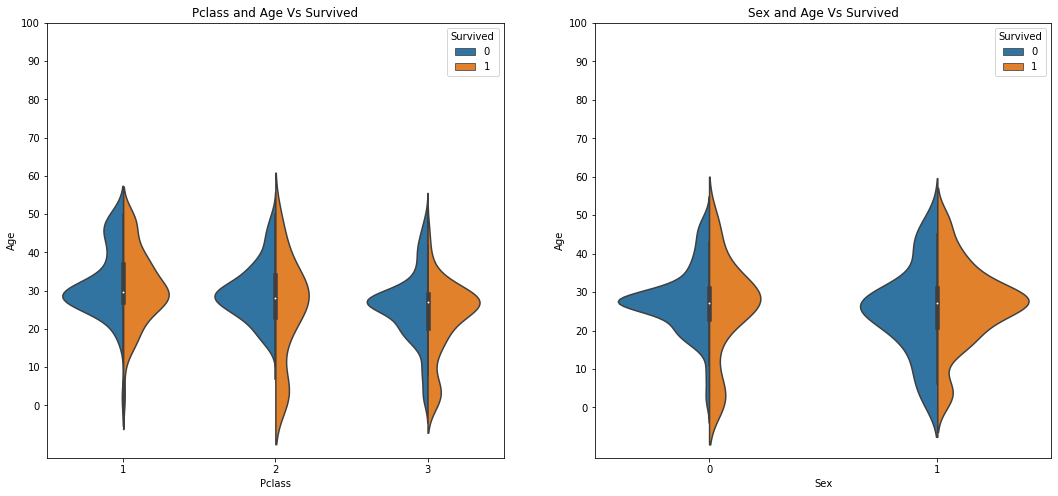

In [534]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot('Pclass', 'Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age Vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("Sex", "Age", hue="Survived", data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age Vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

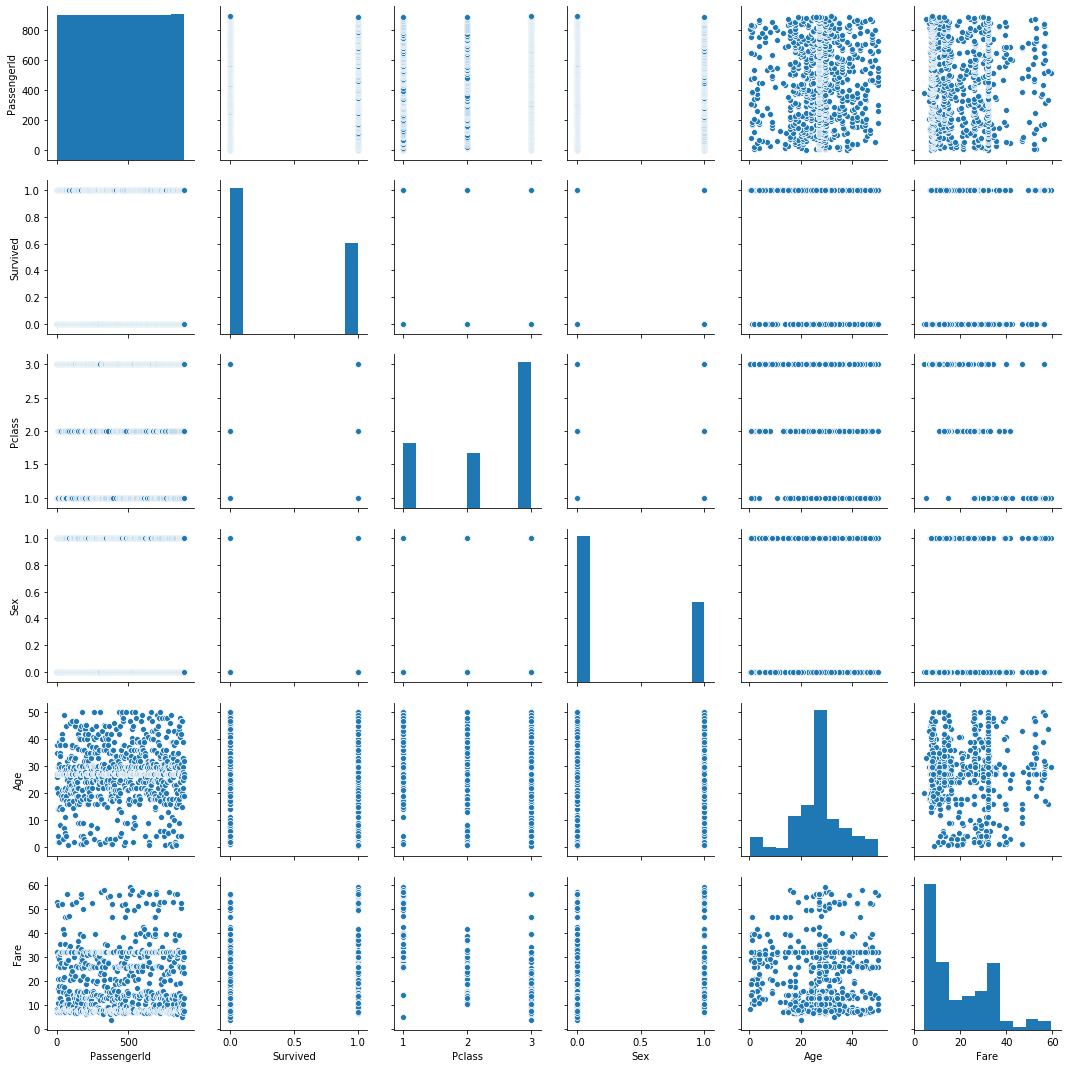

In [535]:
df_cont=df.iloc[:,:-3]
df_cont
sb.pairplot(df_cont)

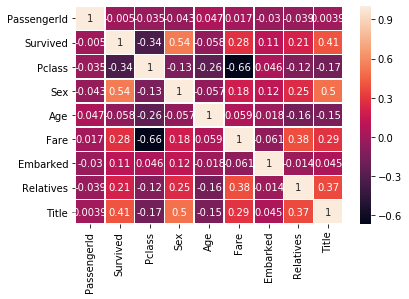

In [536]:
sb.heatmap(df.corr(), annot=True, linewidth=0.5)

# Creating the model

In [537]:
X, y = df[:624], df[624:]

In [538]:
X.shape

(624, 9)

In [539]:
y.shape

(267, 9)

In [540]:
X_train = X.drop("Survived", axis=1)
Y_train = X["Survived"]
X_test  = y.drop("PassengerId", axis=1).copy()

In [541]:
X_train.shape, Y_train.shape, X_test.shape

((624, 8), (624,), (267, 8))

In [542]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.45

In [543]:
# knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.33

In [544]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [545]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [546]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Random Forest','Decision Tree'],
    'Score': [acc_knn, acc_log, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,100.00
3,Decision Tree,100.00
1,Logistic Regression,80.45
0,KNN,79.33
